In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Load the dataset
churn_data = pd.read_csv('./Churn_Modelling.csv')


In [3]:
# Clean column names
churn_data.columns = churn_data.columns.str.strip().str.lower()


In [4]:
# Handle missing values and duplicates
churn_data.isna().sum()
churn_data[churn_data.duplicated(subset=['customerid'], keep=False)]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited


In [5]:
# Drop unnecessary columns
churn_data.drop(['rownumber', 'customerid', 'surname', 'geography', 'gender'], axis=1, inplace=True)


In [6]:
# Downsample the majority class
churn_majority = churn_data[churn_data['exited'] == 0]
churn_minority = churn_data[churn_data['exited'] == 1]
downsampled_majority = resample(churn_majority, n_samples=2037, replace=False, random_state=42)
balanced_churn = pd.concat([downsampled_majority, churn_minority])


In [7]:
# Separate features and target variable
X = balanced_churn.drop(['exited'], axis=1)
y = balanced_churn['exited']


In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# Logistic Regression with L1 penalty
log_reg_l1 = LogisticRegressionCV(max_iter=500, solver='liblinear', penalty='l1', cv=3, Cs=10)
log_reg_l1.fit(X_train, y_train)

LogisticRegressionCV(cv=3, max_iter=500, penalty='l1', solver='liblinear')

In [10]:
# Scores
print(f"Training Score (L1): {log_reg_l1.score(X_train, y_train)}")
print(f"Test Score (L1): {log_reg_l1.score(X_test, y_test)}")

Training Score (L1): 0.6818660119256401
Test Score (L1): 0.7023712183156173


In [11]:
# Predictions
y_pred_lr = log_reg_l1.predict(X_test)


In [12]:
# Evaluation metrics
print(f"Precision (L1): {precision_score(y_test, y_pred_lr)}")
print(f"Recall (L1): {recall_score(y_test, y_pred_lr)}")
print(f"Accuracy (L1): {accuracy_score(y_test, y_pred_lr)}")
print(f"F1 Score (L1): {f1_score(y_test, y_pred_lr)}")

Precision (L1): 0.6786296900489397
Recall (L1): 0.7135506003430532
Accuracy (L1): 0.7023712183156173
F1 Score (L1): 0.6956521739130435


<Figure size 800x600 with 0 Axes>

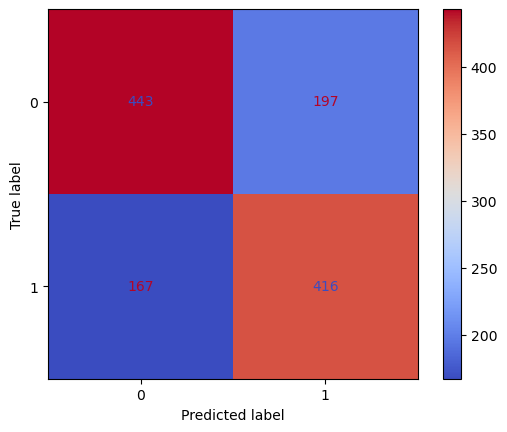

In [13]:
# Confusion Matrix
# For Logistic Regression L1
cmd_lr = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr, labels=log_reg_l1.classes_), display_labels=log_reg_l1.classes_)
plt.figure(figsize=(8, 6))  # Set figure size before calling plot
cmd_lr.plot(cmap='coolwarm')

In [14]:
# Logistic Regression with L2 penalty
log_reg_l2 = LogisticRegressionCV(max_iter=500, solver='liblinear', penalty='l2', cv=4, Cs=10)
log_reg_l2.fit(X_train, y_train)

LogisticRegressionCV(cv=4, max_iter=500, solver='liblinear')

In [15]:
# Scores
print(f"Training Score (L2): {log_reg_l2.score(X_train, y_train)}")
print(f"Test Score (L2): {log_reg_l2.score(X_test, y_test)}")


Training Score (L2): 0.6639775517362329
Test Score (L2): 0.6590351594439902


In [16]:
# Predictions
y_pred_lr2 = log_reg_l2.predict(X_test)

In [17]:
# Evaluation metrics
print(f"Precision (L2): {precision_score(y_test, y_pred_lr2)}")
print(f"Recall (L2): {recall_score(y_test, y_pred_lr2)}")
print(f"Accuracy (L2): {accuracy_score(y_test, y_pred_lr2)}")
print(f"F1 Score (L2): {f1_score(y_test, y_pred_lr2)}")

Precision (L2): 0.628482972136223
Recall (L2): 0.6963979416809606
Accuracy (L2): 0.6590351594439902
F1 Score (L2): 0.660699755899105


<Figure size 800x600 with 0 Axes>

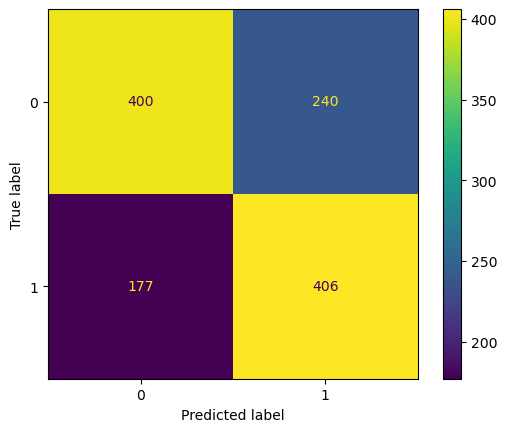

In [18]:
# Confusion Matrix
# For Logistic Regression L2
cmd_lr2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr2, labels=log_reg_l2.classes_), display_labels=log_reg_l2.classes_)
plt.figure(figsize=(8, 6))  # Set figure size before calling plot
cmd_lr2.plot(cmap='viridis')

In [19]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [20]:
# Scores
print(f"KNN Training Score: {knn.score(X_train, y_train)}")
print(f"KNN Test Score: {knn.score(X_test, y_test)}")

KNN Training Score: 0.7642932304454577
KNN Test Score: 0.5257563368765331


In [21]:
# Predictions
y_pred_knn = knn.predict(X_test)

In [22]:
# Evaluation metrics
print(f"Precision (KNN): {precision_score(y_test, y_pred_knn)}")
print(f"Recall (KNN): {recall_score(y_test, y_pred_knn)}")
print(f"Accuracy (KNN): {accuracy_score(y_test, y_pred_knn)}")
print(f"F1 Score (KNN): {f1_score(y_test, y_pred_knn)}")

Precision (KNN): 0.5025906735751295
Recall (KNN): 0.49914236706689535
Accuracy (KNN): 0.5257563368765331
F1 Score (KNN): 0.5008605851979346


<Figure size 800x600 with 0 Axes>

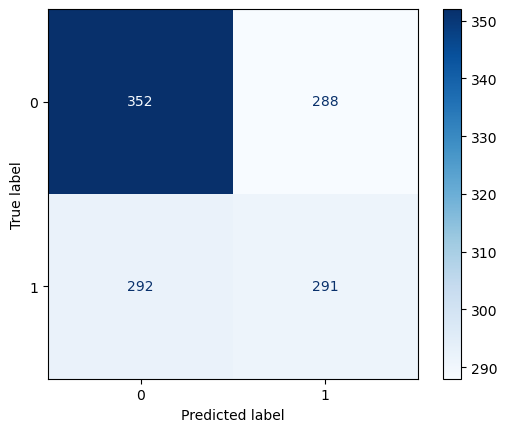

In [23]:
# Confusion Matrix
# For KNN
cmd_knn = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn, labels=knn.classes_), display_labels=knn.classes_)
plt.figure(figsize=(8, 6))  # Set figure size before calling plot
cmd_knn.plot(cmap='Blues')


In [24]:
# Standard Scaling for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Fit the KNN model with scaled data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [26]:
# Scores with scaled data
print(f"KNN Training Score (Scaled): {knn.score(X_train_scaled, y_train)}")
print(f"KNN Test Score (Scaled): {knn.score(X_test_scaled, y_test)}")

KNN Training Score (Scaled): 0.8439144159943879
KNN Test Score (Scaled): 0.7195421095666394


In [27]:
# Predictions
y_pred_knn_scaled = knn.predict(X_test_scaled)

In [28]:
# Evaluation metrics
print(f"Precision (KNN Scaled): {precision_score(y_test, y_pred_knn_scaled)}")
print(f"Recall (KNN Scaled): {recall_score(y_test, y_pred_knn_scaled)}")
print(f"Accuracy (KNN Scaled): {accuracy_score(y_test, y_pred_knn_scaled)}")
print(f"F1 Score (KNN Scaled): {f1_score(y_test, y_pred_knn_scaled)}")

Precision (KNN Scaled): 0.7061855670103093
Recall (KNN Scaled): 0.7049742710120068
Accuracy (KNN Scaled): 0.7195421095666394
F1 Score (KNN Scaled): 0.7055793991416309


<Figure size 800x600 with 0 Axes>

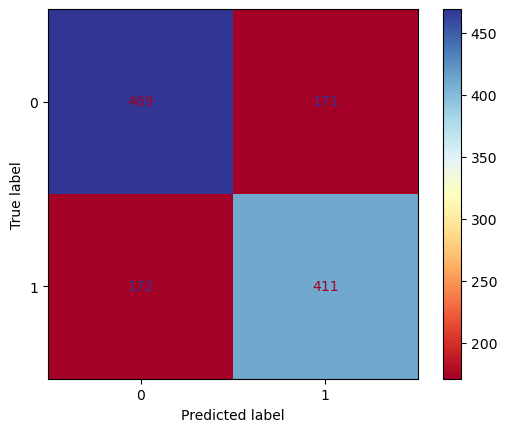

In [29]:
# Confusion Matrix for scaled KNN
cmd_knn_scaled = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn_scaled, labels=knn.classes_), display_labels=knn.classes_)
plt.figure(figsize=(8, 6))  # Set figure size before calling plot
cmd_knn_scaled.plot(cmap='RdYlBu')


In [30]:
# Support Vector Classifier
svc_model = SVC(kernel='rbf', gamma=2, C=1)
svc_model.fit(X_train, y_train)


SVC(C=1, gamma=2)

In [31]:
# Scores
print(f"SVC Training Score: {svc_model.score(X_train, y_train)}")
print(f"SVC Test Score: {svc_model.score(X_test, y_test)}")

SVC Training Score: 1.0
SVC Test Score: 0.4766966475878986


In [32]:
# Predictions
y_pred_svc = svc_model.predict(X_test)

In [33]:
# Evaluation metrics
print(f"Precision (SVC): {precision_score(y_test, y_pred_svc)}")
print(f"Recall (SVC): {recall_score(y_test, y_pred_svc)}")
print(f"Accuracy (SVC): {accuracy_score(y_test, y_pred_svc)}")
print(f"F1 Score (SVC): {f1_score(y_test, y_pred_svc)}")


Precision (SVC): 0.4766966475878986
Recall (SVC): 1.0
Accuracy (SVC): 0.4766966475878986
F1 Score (SVC): 0.64562569213732


<Figure size 800x600 with 0 Axes>

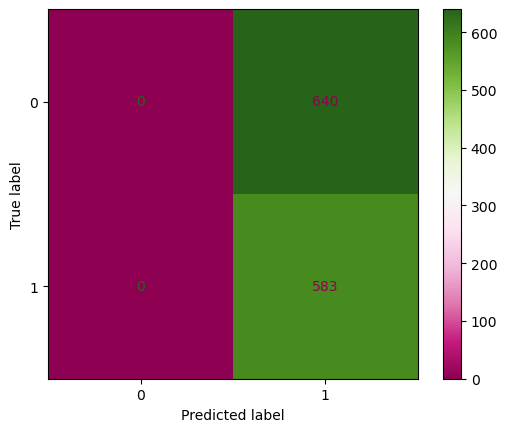

In [79]:
# Confusion Matrix for SVC
# For SVC
cmd_svc = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_svc, labels=svc_model.classes_), display_labels=svc_model.classes_)
plt.figure(figsize=(8, 6))  # Set figure size before calling plot
cmd_svc.plot(cmap='PiYG')
plt.show()
